In [23]:
#Import Libraries
import numpy as np
import scipy as sp
import scipy.io.wavfile as spw
import time as tm
import math as math
import matplotlib.pyplot as plt


In [16]:
#Problem 1
#read files, arrange in arrays and floats to avoid errors
clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')
corwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/Corcovado.wav')

clp_arr = np.array(clipwave[1])
cor_arr = np.array(corwave[1])

clp = float(clipwave[0])
cor = float(corwave[0])



/var/folders/y1/wt0h1yhn5hxd3qg29h4rkdgm0000gn/T/ipykernel_57525/1260997478.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')


In [18]:
#correlate signals in the left channel, find time the clip starts in the song.
Cor = sp.signal.correlate(clp_arr[:,0],cor_arr[:,0],'valid')
Max = np.argmax(Cor)
Max_time = (Max-clp_arr.shape[0])/cor
print(Max_time)

Max - clp_arr.shape[0]


38.180589569161


1683764

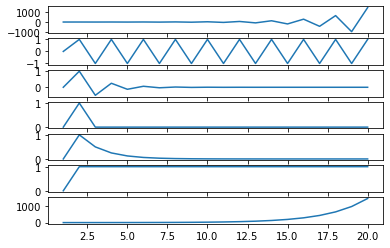

In [81]:
# Problem 2 Feedback System
num = np.zeros(20)
num[0] = 1
alp = np.linspace(-1.5,1.5,7)
x = np.linspace(1,20,20)

def Feedsys(num,alp):

    h = [0,0,1]
    y = np.zeros(num.shape[0])
    h2 = [0,alp,0]

    for i in range(20):
        output1 = np.convolve(num,h,'same')
        y[i] = output1[i]
        output2 = np.convolve(y,h2,'same')
        num[i] += output2[i]
    return y



fig, ax = plt.subplots(7,1)

ys = Feedsys(num, alp[0])
ax[0].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[1])
ax[1].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[2])
ax[2].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[3])
ax[3].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[4])
ax[4].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[5])
ax[5].plot(x,ys)
num = np.zeros(20)
num[0] = 1
ys = Feedsys(num, alp[6])
ax[6].plot(x,ys)

#Finite Infinite length graphs are: For alphas abs(>1)
#Stable System Graphs are: Graph 3,4,5 are stable
#Causal Systems Graphs are: All of them are causal

In [20]:
#Problem 3
#function for Discrete Time Fourier Transform
def MyDTFT(x):
    f = np.linspace(-math.pi,math.pi,10001)
    dtf = np.zeros(f.shape[0],dtype='complex')
    n = np.array(range(0,x.shape[0]))
    for i,j in enumerate(f):
        dtf[i] = np.sum(x*np.exp(-1j*j*n))
    return f,dtf

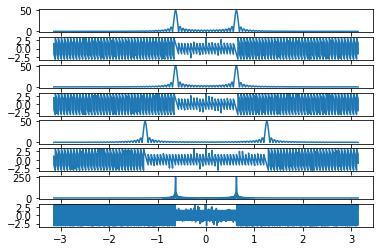

In [29]:
# Base Graphs and setting up plots

n = np.linspace(0,100,101)
x = np.sin(2*math.pi*0.1*n)
j,dtf = MyDTFT(x)
p = np.angle(dtf)
m = abs(dtf)
fig, ax = plt.subplots(8,1)

ax[0].plot(j,m)
ax[1].plot(j,p)

# Change Phase by 10

n = np.linspace(0,100,101)
x = np.sin(2*math.pi*0.1*(n+10))
j,dtf = MyDTFT(x)
p = np.angle(dtf)
m = abs(dtf)

ax[2].plot(j,m)
ax[3].plot(j,p)

# Change Frequency to f = 2

n = np.linspace(0,100,101)
x = np.sin(2*math.pi*0.2*n)
j,dtf = MyDTFT(x)
p = np.angle(dtf)
m = abs(dtf)

ax[4].plot(j,m)
ax[5].plot(j,p)

#Change length to 500

n = np.linspace(0,500,501)
x = np.sin(2*math.pi*0.1*n)
j,dtf = MyDTFT(x)
p = np.angle(dtf)
m = abs(dtf)

ax[6].plot(j,m)
ax[7].plot(j,p)
